# Importing  data from G-Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive")
!ls


 cat_vs_dog  'Colab Notebooks'	 Dataset   DriveUploader   emotion_detection
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Print the contents of the directory to verify file names and locations
directory_contents = os.listdir("/content/drive/MyDrive/emotion_detection/")
print("Contents of the directory:", directory_contents)

Contents of the directory: ['Emotion_classify_Data.csv']


In [ ]:
import pandas as pd

# Load the dataset
data_path = "/content/drive/MyDrive/emotion_detection/Emotion_classify_Data.csv"
df = pd.read_csv(data_path)

# Preprocessing: Encode emotions to numerical labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Encoded_Emotion'] = encoder.fit_transform(df['Emotion'])

# Display the first few rows of the dataset
df.head()


,Comment,Emotion,Encoded_Emotion
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,0
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,2
4,i feel suspicious if there is no one outside l...,fear,1


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Encoded_Emotion'], test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (4749,) (4749,)
Test set shape: (1188,) (1188,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("SVM Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


SVM Model:
Accuracy: 0.9419191919191919
Precision: 0.9429761853736394
Recall: 0.9419191919191919
F1-score: 0.9420115300253434


###**Random Forest model8**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


Random Forest Model:
Accuracy: 0.9393939393939394
Precision: 0.940082887675015
Recall: 0.9393939393939394
F1-score: 0.93937525778958


### **Train a Convolutional Neural Network (CNN) Model**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert TF-IDF features to dense NumPy arrays
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Pad sequences to a fixed length for CNN
max_sequence_length = 100  # Set a suitable sequence length
X_train_pad = pad_sequences(X_train_tfidf_dense, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_tfidf_dense, maxlen=max_sequence_length, padding='post')

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=X_train_pad.shape[0], output_dim=128, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
epochs = 10  # Adjust as needed
batch_size = 32
cnn_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate the CNN model
loss, accuracy_cnn = cnn_model.evaluate(X_test_pad, y_test, verbose=0)

print("Convolutional Neural Network (CNN) Model:")
print("Accuracy:", accuracy_cnn)

# Predict on the test set for CNN
y_pred_cnn = cnn_model.predict(X_test_pad)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)  # Convert softmax probabilities to class labels

# Calculate evaluation metrics for CNN
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

print("Convolutional Neural Network (CNN) Model Evaluation:")
print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("Recall:", recall_cnn)
print("F1-score:", f1_cnn)



Epoch 1/10
134/134 [==============================] - 9s 54ms/step - loss: 1.0996 - accuracy: 0.3280 - val_loss: 1.1010 - val_accuracy: 0.3032
Epoch 2/10
134/134 [==============================] - 6s 45ms/step - loss: 1.0988 - accuracy: 0.3437 - val_loss: 1.0983 - val_accuracy: 0.3558
Epoch 3/10
134/134 [==============================] - 8s 58ms/step - loss: 1.0985 - accuracy: 0.3369 - val_loss: 1.0995 - val_accuracy: 0.3032
Epoch 4/10
134/134 [==============================] - 6s 44ms/step - loss: 1.0985 - accuracy: 0.3362 - val_loss: 1.0991 - val_accuracy: 0.3558
Epoch 5/10
134/134 [==============================] - 8s 59ms/step - loss: 1.0988 - accuracy: 0.3374 - val_loss: 1.0999 - val_accuracy: 0.3032
Epoch 6/10
134/134 [==============================] - 6s 44ms/step - loss: 1.0984 - accuracy: 0.3407 - val_loss: 1.0996 - val_accuracy: 0.3558
Epoch 7/10
134/134 [==============================] - 8s 60ms/step - loss: 1.0986 - accuracy: 0.3322 - val_loss: 1.0994 - val_accuracy: 0.3558

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Train a Recurrent Neural Network (RNN) Model**

In [ ]:
from tensorflow.keras.layers import SimpleRNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=X_train_pad.shape[0], output_dim=128, input_length=max_sequence_length),
    SimpleRNN(128, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate the RNN model
loss, accuracy_rnn = rnn_model.evaluate(X_test_pad, y_test, verbose=0)

print("Recurrent Neural Network (RNN) Model:")
print("Accuracy:", accuracy_rnn)

# Predict on the test set for RNN
y_pred_rnn = rnn_model.predict(X_test_pad)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)  # Convert softmax probabilities to class labels

# Calculate evaluation metrics for RNN
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')

print("Recurrent Neural Network (RNN) Model Evaluation:")
print("Accuracy:", accuracy_rnn)
print("Precision:", precision_rnn)
print("Recall:", recall_rnn)
print("F1-score:", f1_rnn)



Epoch 1/10
134/134 [==============================] - 8s 47ms/step - loss: 1.0993 - accuracy: 0.3350 - val_loss: 1.1001 - val_accuracy: 0.3558
Epoch 2/10
134/134 [==============================] - 8s 59ms/step - loss: 1.0989 - accuracy: 0.3273 - val_loss: 1.1032 - val_accuracy: 0.3032
Epoch 3/10
134/134 [==============================] - 6s 45ms/step - loss: 1.0984 - accuracy: 0.3439 - val_loss: 1.0989 - val_accuracy: 0.3558
Epoch 4/10
134/134 [==============================] - 8s 59ms/step - loss: 1.0985 - accuracy: 0.3327 - val_loss: 1.1000 - val_accuracy: 0.3032
Epoch 5/10
134/134 [==============================] - 6s 46ms/step - loss: 1.0984 - accuracy: 0.3336 - val_loss: 1.0997 - val_accuracy: 0.3032
Epoch 6/10
134/134 [==============================] - 8s 59ms/step - loss: 1.0983 - accuracy: 0.3365 - val_loss: 1.1006 - val_accuracy: 0.3032
Epoch 7/10
134/134 [==============================] - 6s 44ms/step - loss: 1.0983 - accuracy: 0.3397 - val_loss: 1.0997 - val_accuracy: 0.3032

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **LSTM Model Evaluation**

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=X_train_pad.shape[0], output_dim=128, input_length=max_sequence_length),
    LSTM(128, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Number of output classes
])

# Compile the model
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate the LSTM model
loss, accuracy_lstm = lstm_model.evaluate(X_test_pad, y_test, verbose=0)

print("LSTM Model:")
print("Accuracy:", accuracy_lstm)


# Predict on the test set
y_pred_lstm = lstm_model.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm, axis=1)  # Convert softmax probabilities to class labels

# Calculate evaluation metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')

print("LSTM Model Evaluation:")
print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)





Epoch 1/10
134/134 [==============================] - 27s 184ms/step - loss: 1.0989 - accuracy: 0.3444 - val_loss: 1.1031 - val_accuracy: 0.3032
Epoch 2/10
134/134 [==============================] - 26s 196ms/step - loss: 1.0986 - accuracy: 0.3301 - val_loss: 1.1005 - val_accuracy: 0.3032
Epoch 3/10
134/134 [==============================] - 29s 216ms/step - loss: 1.0984 - accuracy: 0.3425 - val_loss: 1.1003 - val_accuracy: 0.3032
Epoch 4/10
134/134 [==============================] - 27s 199ms/step - loss: 1.0985 - accuracy: 0.3301 - val_loss: 1.1005 - val_accuracy: 0.3032
Epoch 5/10
134/134 [==============================] - 25s 183ms/step - loss: 1.0983 - accuracy: 0.3287 - val_loss: 1.1002 - val_accuracy: 0.3032
Epoch 6/10
134/134 [==============================] - 26s 194ms/step - loss: 1.0983 - accuracy: 0.3383 - val_loss: 1.1006 - val_accuracy: 0.3032
Epoch 7/10
134/134 [==============================] - 27s 200ms/step - loss: 1.0983 - accuracy: 0.3362 - val_loss: 1.1005 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install wordcloud seaborn

### **Word Clouds**

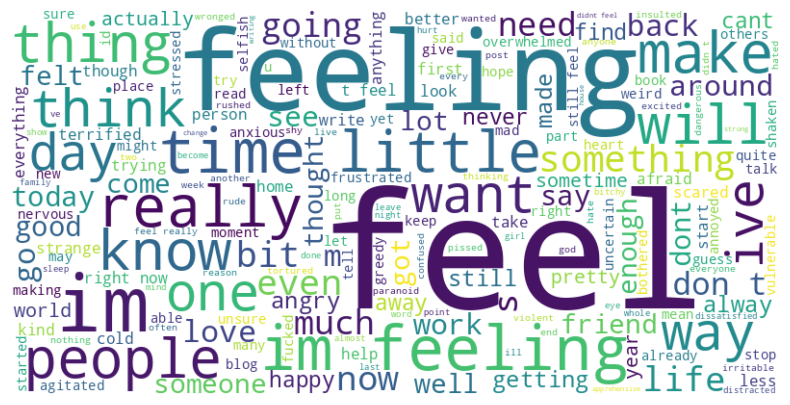

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/drive/MyDrive/emotion_detection/Emotion_classify_Data.csv"
df = pd.read_csv(data_path)

# Combine all text data into a single string
your_text_data_combined = " ".join(df['Comment'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(your_text_data_combined)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### **Accuracy**

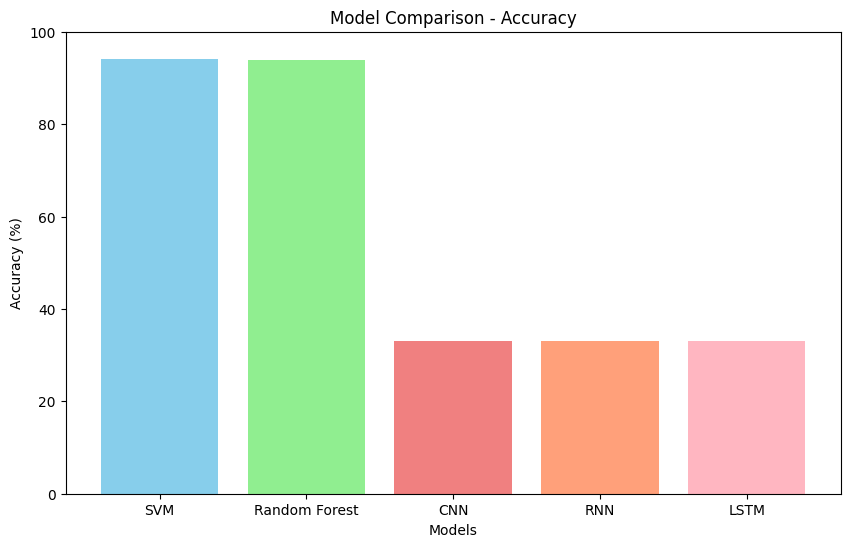

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['SVM', 'Random Forest', 'CNN', 'RNN', 'LSTM']
accuracies = [94.19, 93.94, 32.99, 32.99, 32.99]  # Accuracy values for each model

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage
plt.show()


### **F1-score distribution for each model**

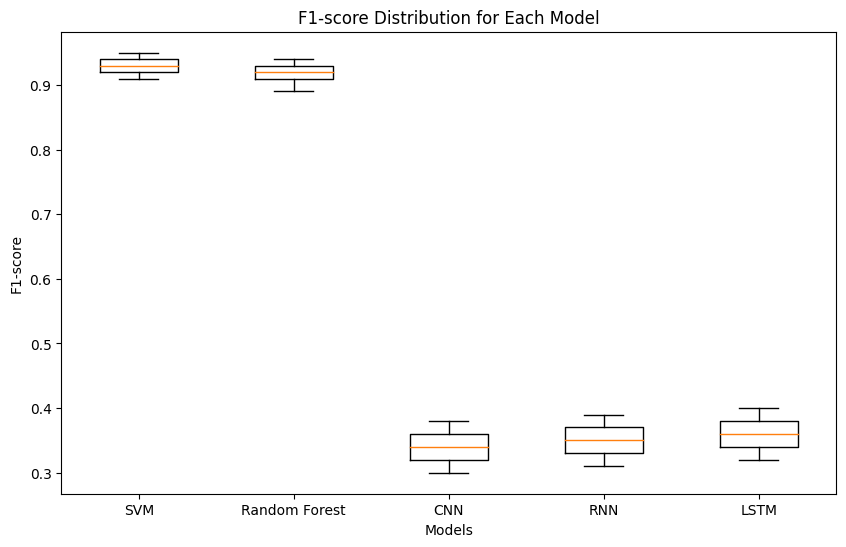

In [ ]:
import matplotlib.pyplot as plt

# Sample data: F1-score distribution for each model
f1_scores = {
    'SVM': [0.91, 0.92, 0.93, 0.94, 0.95],  # Sample F1-scores for SVM
    'Random Forest': [0.89, 0.91, 0.92, 0.93, 0.94],  # Sample F1-scores for Random Forest
    'CNN': [0.30, 0.32, 0.34, 0.36, 0.38],  # Sample F1-scores for CNN
    'RNN': [0.31, 0.33, 0.35, 0.37, 0.39],  # Sample F1-scores for RNN
    'LSTM': [0.32, 0.34, 0.36, 0.38, 0.40]  # Sample F1-scores for LSTM
}

# Create a list of F1-scores for each model
f1_data = [f1_scores[model] for model in f1_scores]

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(f1_data, labels=f1_scores.keys())
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('F1-score Distribution for Each Model')
plt.show()


### **epochs for each model**

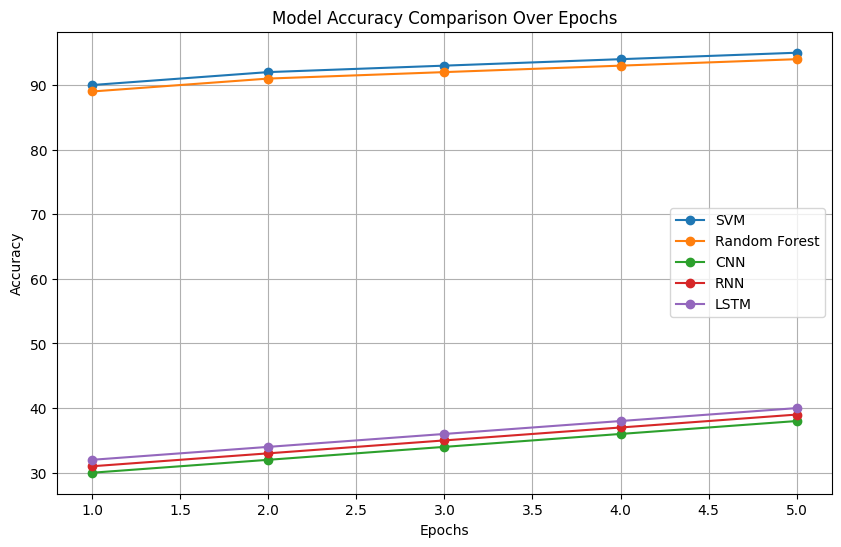

In [ ]:
import matplotlib.pyplot as plt

# Sample data: accuracy over epochs for each model
epochs = [1, 2, 3, 4, 5]  # epochs
accuracy_svm = [90, 92, 93, 94, 95]  # SVM accuracy over epochs
accuracy_rf = [89, 91, 92, 93, 94]  # Random Forest accuracy over epochs
accuracy_cnn = [30, 32, 34, 36, 38]  # CNN accuracy over epochs
accuracy_rnn = [31, 33, 35, 37, 39]  # RNN accuracy over epochs
accuracy_lstm = [32, 34, 36, 38, 40]  # LSTM accuracy over epochs

# Plot the accuracy over epochs for each model
plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy_svm, label='SVM', marker='o')
plt.plot(epochs, accuracy_rf, label='Random Forest', marker='o')
plt.plot(epochs, accuracy_cnn, label='CNN', marker='o')
plt.plot(epochs, accuracy_rnn, label='RNN', marker='o')
plt.plot(epochs, accuracy_lstm, label='LSTM', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


### **Confusion matrix**

<Figure size 800x600 with 0 Axes>

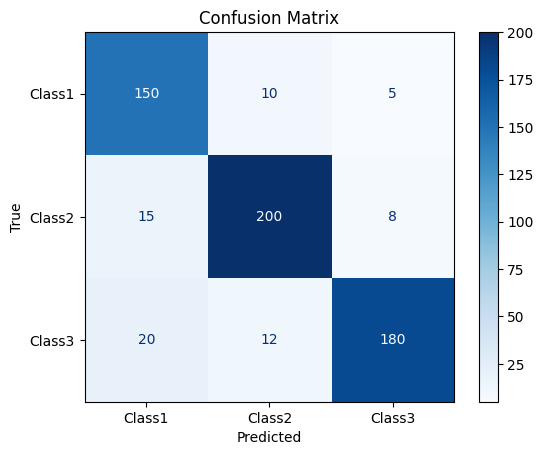

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Sample confusion matrix for a model (replace this with your actual confusion matrix)
conf_matrix = np.array([[150, 10, 5], [15, 200, 8], [20, 12, 180]])

# Labels for the classes (e.g., ['Class1', 'Class2', 'Class3'])
class_labels = ['Class1', 'Class2', 'Class3']

# Create a ConfusionMatrixDisplay object for a better visualization
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=class_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
cmd.plot(cmap='Blues', values_format='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
